# Random Forest for coastal feature extraction.

The code and this notebook can be found on the github repo: 

In [22]:
from utils.data import Data
%matplotlib inline

* We encapsulate all our functions related to data processing in utils.data
* tiff_filename and shp_filename are two required parameters for Data class
* The other parameters include classes (Index for labels and its corresponding name), and default channel (for visualization in case of tiffs with multiple channels)
* We can use data.get_constants() to print all the parameters for data object

In [23]:
tiff_name = "./Data/Images/5_band3.tif"
shp_name = "./Data/Labels/5_band3.shp"
data = Data(tiff_name, shp_name, classes = ["water", "land"])
data.get_constants()

Tiff: ./Data/Images/5_band3.tif
Shp: ./Data/Labels/5_band3.shp
Classes: ['water', 'land']
Default channel: (1, 2, 3)
Savepath: ./outputs


Once we have the object created for Data class
* data.read_tiff() -> reads the tiff_filename and returns rasterio object
* data.read_shp() -> reads shp_filename and returns geopandas object
* data.check_crs() -> raises an error if the crs of two objects don't match, verbose prints the crs for each object
* data.get_tiff_details(tiff) -> reads the rasterio object and prints details of the tiff

In [24]:
tiff = data.read_tiff()
shp = data.read_shp()
#data.check_crs(shp.crs, tiff.crs, verbose=True)

In [25]:
data.get_tiff_details(tiff)

Filename: ./Data/Images/5_band3.tif
Bands: 5
Width (pixels): 7968
Height (pixels): 7773
CRS: EPSG:3338
Bounds: BoundingBox(left=381506.24129992817, bottom=2259715.20420001, right=384295.0412999274, top=2262435.754200009)


We need to convert geopandas polygon information to masks that correspond with given tiff image. For this, we can use data.get_mask(). This function burns the polygon into tiff file to produce image mask of dimensions tiff_height * tiff_width * len(classes) where classes represent the index, name dictionary for output labels. (Since we have only two labels (land and water), mask will have 2 channels)

In [26]:
mask = data.get_mask()
#print(mask.shape)

/home/mibook/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


### Data Visualization
* data.view_tiff(tiff) -> reads rasterio object from read_tiff() and uses default channels to visualize as RGB
* you can also pass an integer as parameter channel to visualize that channel only
* data.view_mask(mask) -> reads the mask numpy array and visualizes it as labeled images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


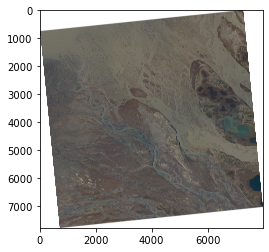

In [28]:
data.view_tiff(tiff)

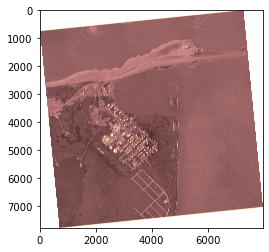

In [7]:
data.view_tiff(tiff, channel=3)

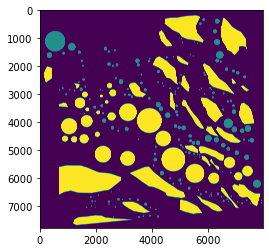

In [27]:
data.view_mask(mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


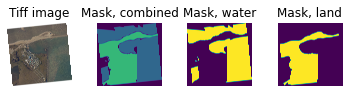

In [9]:
data.view_tiff_labels(tiff, mask)

In [10]:
X, y = data.get_Xy(tiff, mask, n_sample = 100000)
X_train, X_test, y_train, y_test = data.train_test_split(X, y)

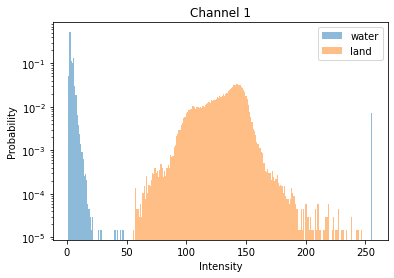

In [11]:
data.get_histogram(X_train, y_train, channel = 1)

In [12]:
from utils.estimators import Dataset, Classifier

In [13]:
dataset = Dataset(X_train, X_test, y_train, y_test)
dataset.info()

No. of classes: 2
Class labels: ['water', 'land']
Total data samples: 200000
Train samples: 134000
	 0:water = 67187
	 1:land = 66813
Test stats: 66000
	 1:land = 33187
	 0:water = 32813


In [14]:
classifier = Classifier()

In [15]:
#classifier.random_forest(trainX=dataset.trainX, trainY=dataset.trainY, testX=dataset.testX, testY=dataset.testY,
#                  grid_search=True, train=False)
# The best parameters are {'max_depth': 3, 'n_estimators': 10} with a score of 1.00
#classifier.random_forest(trainX=dataset.trainX, trainY=dataset.trainY, testX=dataset.testX, testY=dataset.testY,
#                  grid_search=False, train=True)

In [16]:
# classifier.naive_bayes(trainX=dataset.trainX, trainY=dataset.trainY, testX=dataset.testX, testY=dataset.testY,
#                   grid_search=True, train=False)
# The best parameters are {'alpha': 0.001} with a score of 1.00
# classifier.naive_bayes(trainX=dataset.trainX, trainY=dataset.trainY, testX=dataset.testX, testY=dataset.testY,
#                   grid_search=False, train=True)

### Lets create a test set from another tiff to test across geographic generalization

/home/mibook/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


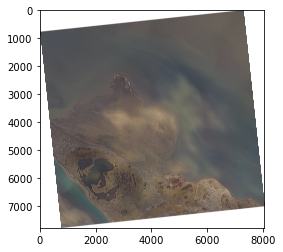

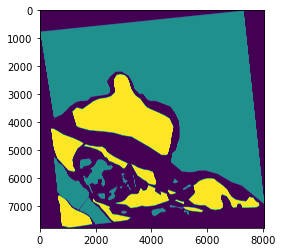

In [17]:
tiff_filename = "./Data/Images/5_band15.tif"
shp_filename = "./Data/Labels/5_band15.shp"
test_data = Data(tiff_filename, shp_filename, classes = ["water", "land"])
test_tiff = test_data.read_tiff() 
actual_mask = test_data.get_mask()
data.view_tiff(test_tiff)
test_data.view_mask(actual_mask)
_X, _y = data.get_Xy(test_tiff, actual_mask, n_sample = 100000)
_X_train, _X_test, _y_train, _y_test = data.train_test_split(_X, _y, save=False)
test_dataset = Dataset(_X_train, _X_test, _y_train, _y_test)

### Testing across samples from same tiff


Random Forest
Elapsed_time training  0.490841 
Accuracy on train Set: 
1.0
Accuracy on Test Set: 
1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32813
           1       1.00      1.00      1.00     33187

    accuracy                           1.00     66000
   macro avg       1.00      1.00      1.00     66000
weighted avg       1.00      1.00      1.00     66000

Confusion Matrix: 
[[32813     0]
 [    0 33187]]


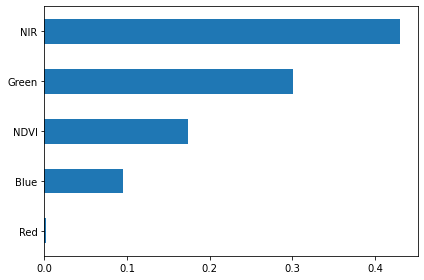

In [18]:
classifier.random_forest(trainX=dataset.trainX, trainY=dataset.trainY, testX=dataset.testX, testY=dataset.testY,
                  grid_search=False, train=True, feature_importance=True)

### Testing on a different geographical region

In [19]:
classifier.random_forest(trainX=dataset.trainX, trainY=dataset.trainY, testX=test_dataset.testX, testY=test_dataset.testY,
                  grid_search=False, train=True, feature_importance=False)


Random Forest
Elapsed_time training  0.486292 
Accuracy on train Set: 
1.0
Accuracy on Test Set: 
0.49716666666666665
Classification Report: 
              precision    recall  f1-score   support

           0       0.50      1.00      0.66     32813
           1       0.00      0.00      0.00     33187

    accuracy                           0.50     66000
   macro avg       0.25      0.50      0.33     66000
weighted avg       0.25      0.50      0.33     66000

Confusion Matrix: 
[[32813     0]
 [33187     0]]


/home/mibook/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using combined both images

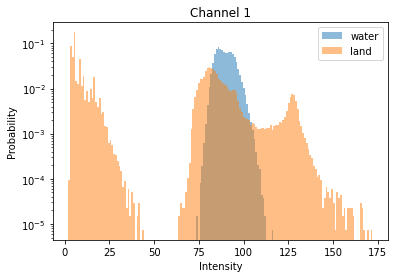


Random Forest
Elapsed_time training  1.077852 
Accuracy on train Set: 
1.0
Accuracy on Test Set: 
1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65742
           1       1.00      1.00      1.00     66258

    accuracy                           1.00    132000
   macro avg       1.00      1.00      1.00    132000
weighted avg       1.00      1.00      1.00    132000

Confusion Matrix: 
[[65742     0]
 [    0 66258]]


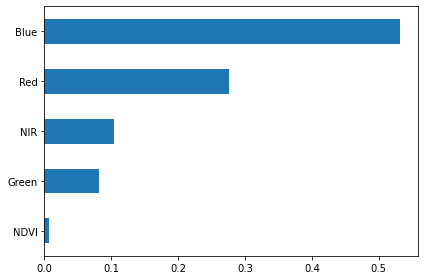

In [20]:
import numpy as np

tiff_filename = "./Data/Images/5_band1.tif"
shp_filename = "./Data/Labels/5_band1.shp"
test_data = Data(tiff_filename, shp_filename, classes = ["water", "land"])
X, y = data.get_Xy(test_tiff, actual_mask, n_sample = 100000)
tiff_filename = "./Data/Images/5_band15.tif"
shp_filename = "./Data/Labels/5_band15.shp"
test_data = Data(tiff_filename, shp_filename, classes = ["water", "land"])
_X, _y = data.get_Xy(test_tiff, actual_mask, n_sample = 100000)
X, y = np.concatenate((X, _X), axis = 0), np.concatenate((y, _y), axis = 0)
X_train, X_test, y_train, y_test = data.train_test_split(X, y, save=False)
data.get_histogram(X_train, y_train, channel = 1)
added_test_dataset = Dataset(X_train, X_test, y_train, y_test)
classifier.random_forest(trainX=added_test_dataset.trainX, trainY=added_test_dataset.trainY, testX=added_test_dataset.testX, testY=added_test_dataset.testY,
                   grid_search=False, train=True, feature_importance=True)

### Using a folderpath as input

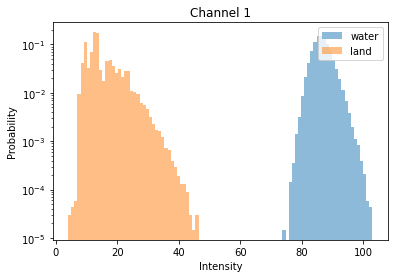


Random Forest
Elapsed_time training  0.399600 
Accuracy on train Set: 
1.0
Accuracy on Test Set: 
1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32813
           1       1.00      1.00      1.00     33187

    accuracy                           1.00     66000
   macro avg       1.00      1.00      1.00     66000
weighted avg       1.00      1.00      1.00     66000

Confusion Matrix: 
[[32813     0]
 [    0 33187]]


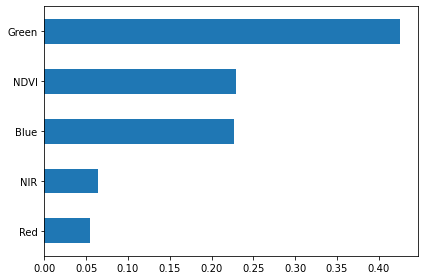

In [21]:
tiff_filename = "./Data/Images/"
shp_filename = "./Data/Labels/"
test_data = Data(tiff_filename, shp_filename, classes = ["water", "land"])
X, y = data.get_Xy(test_tiff, actual_mask, n_sample = 100000)
X_train, X_test, y_train, y_test = data.train_test_split(X, y, save=False)
data.get_histogram(X_train, y_train, channel = 1)
all_dataset = Dataset(X_train, X_test, y_train, y_test)
classifier.random_forest(trainX=all_dataset.trainX, trainY=all_dataset.trainY, testX=all_dataset.testX, testY=all_dataset.testY,
                   grid_search=False, train=True, feature_importance=True)